# Objective

- The main objective of this project is to predict wine quality using machine learning algorithms and analyze which model provides better accuracy by comparing the results. 
- The first step will be doing an Exploratory Data Analysis and preparing the dataset for ML algos by splitting the dataset into train and test datasets.
- Later, different ML algorithms will be trained on the training dataset and then used for prediction on the test dataset.
- Finally, all the results will be compared on the accuracy to identify the best-suited model to predict the wine quality.

## 1. Importing the required libraries and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Loading the dataset and basic exploration

In [2]:
df = pd.read_csv("QualityPrediction.csv")
df.head() #verifying the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### get the basic info about the dataset, such as no of records, no of features, and data type of the features

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Observations: 
- there are 1599 records and 11 (Independent Variables) + 1 (Target Variable) features.
- all features are numeric and in float expect quality which is the target variable.

### based on info() it seems there are no missing values, lets's confirm it

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 3. Let's explore target variable - quality

In [6]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
#Calculating the percentages for each unique quality value
df.quality.value_counts()/len(df) * 100

5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: quality, dtype: float64

### Creating a function to plot histogram so that we can use it easily multiple times for diff features

In [8]:
def get_distplot(col):
    ax = sns.distplot(df[col], bins = 6)
    Q1 = np.percentile(df[col],25)
    Q3 = np.percentile(df[col],75)
    IQR=Q3-Q1    
    lower_threshold = Q1 - 1.5*IQR
    upper_threshold = Q3 + 1.5*IQR
    
    ax.axvline(Q1, color='red', linestyle='-', label="Q1")
    ax.axvline(Q3, color='blue', linestyle='-', label="Q3")
    ax.axvline(lower_threshold, color='yellow', linestyle='-', label="Lower threshold")
    ax.axvline(upper_threshold, color='green', linestyle='-', label="Upper threshold")
    ax.legend()

### Visualization 

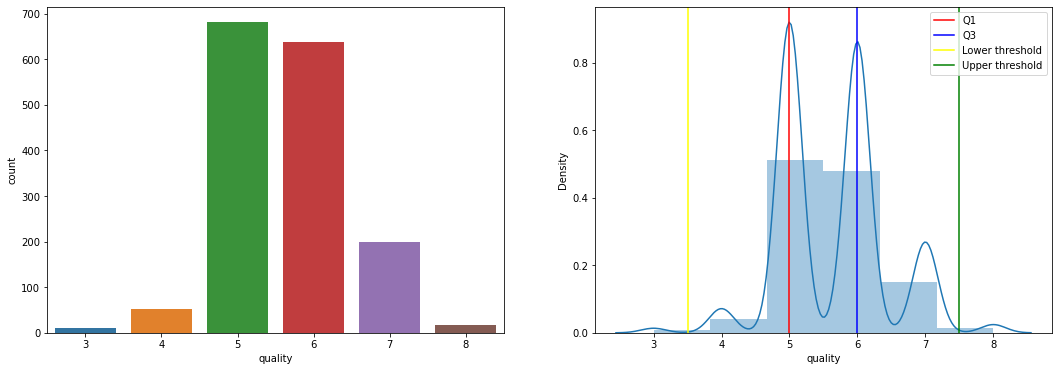

In [9]:
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(121)
ax1 = sns.countplot(df['quality'])
ax2 = fig.add_subplot(122)
ax2 = get_distplot('quality')
plt.show()

### Observations:
- Almost most of the wine in the dataset is of 5 or 6 quality. 
- A very small portion of the wine is rated 3 similarly small portions are rated 8
- there are no wines with quality 1,2,9 or 10
- there is an imbalance in the dataset, extreme values high or low both are underrepresented
- mean and median are very close to each other

## 4. Univariate Exploaration

### Let's check the distribution of each of the features by using a histogram

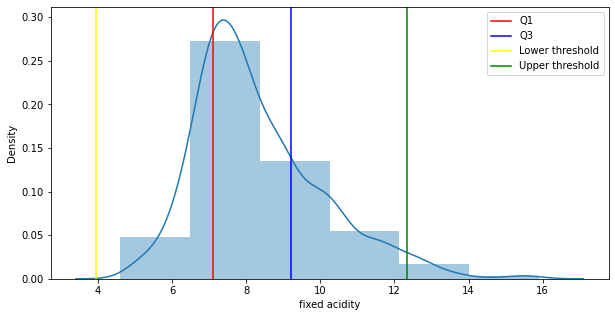

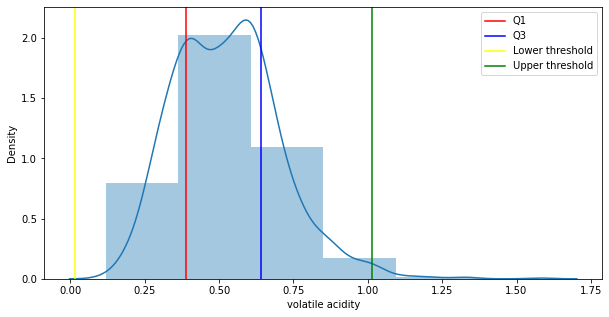

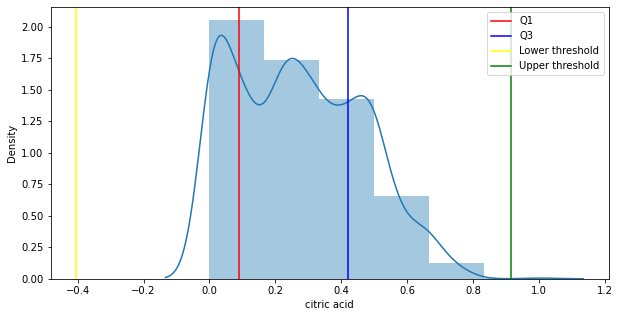

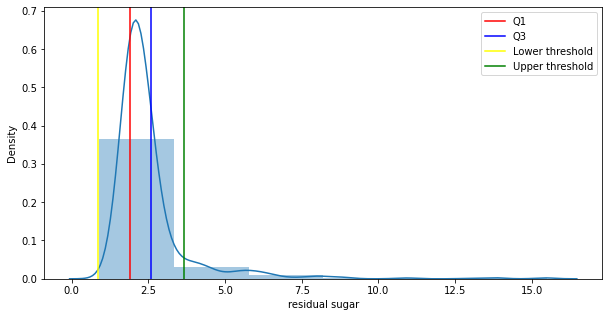

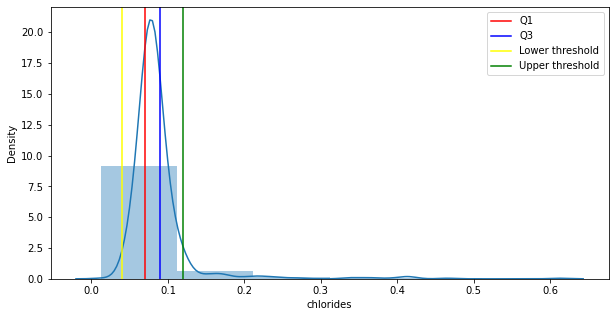

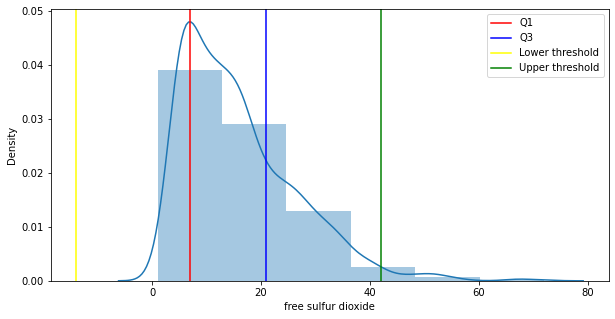

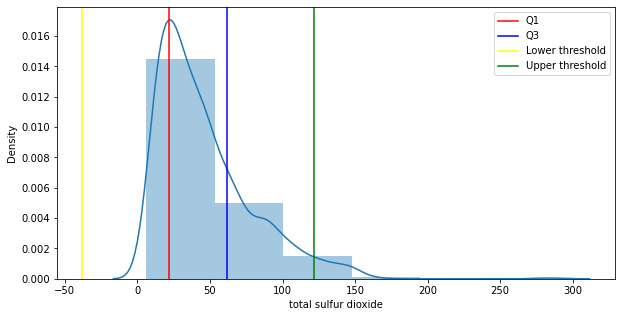

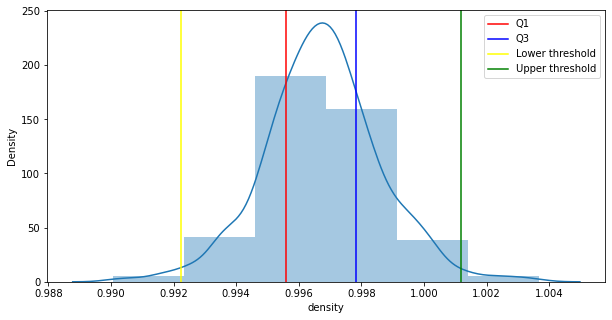

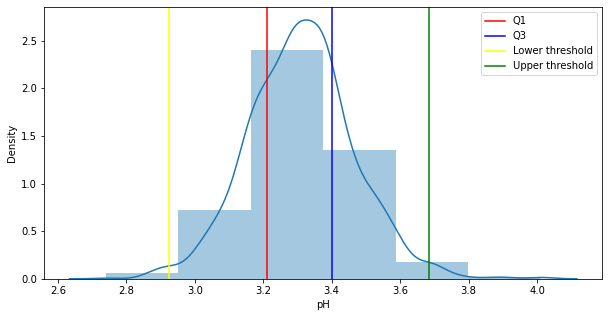

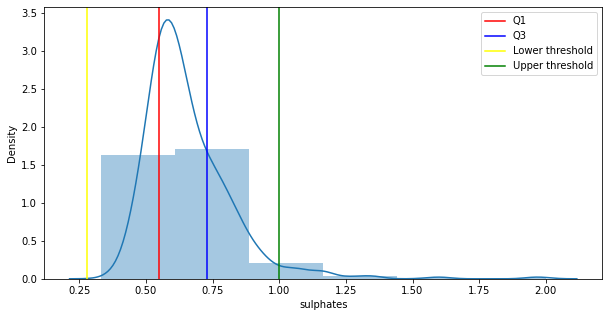

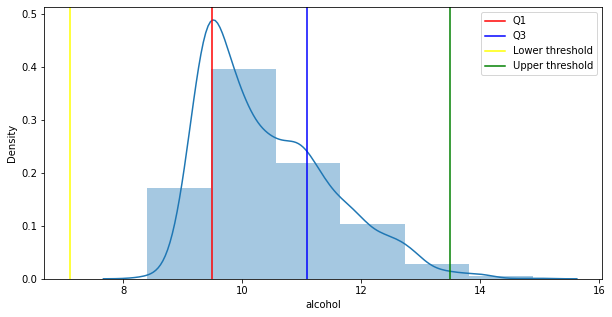

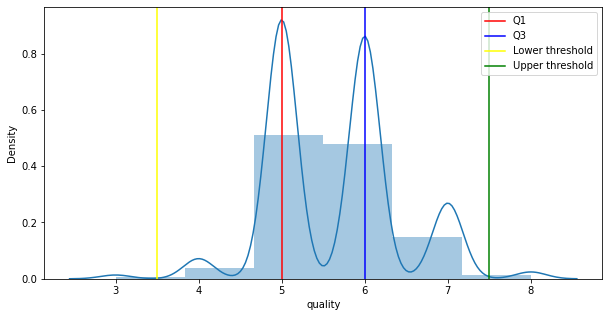

In [10]:
for i in df.columns:
    f, (ax1) = plt.subplots(1,1,figsize=(10,5))
    ax1 = get_distplot(i)

### Let's check the outliers using boxplot

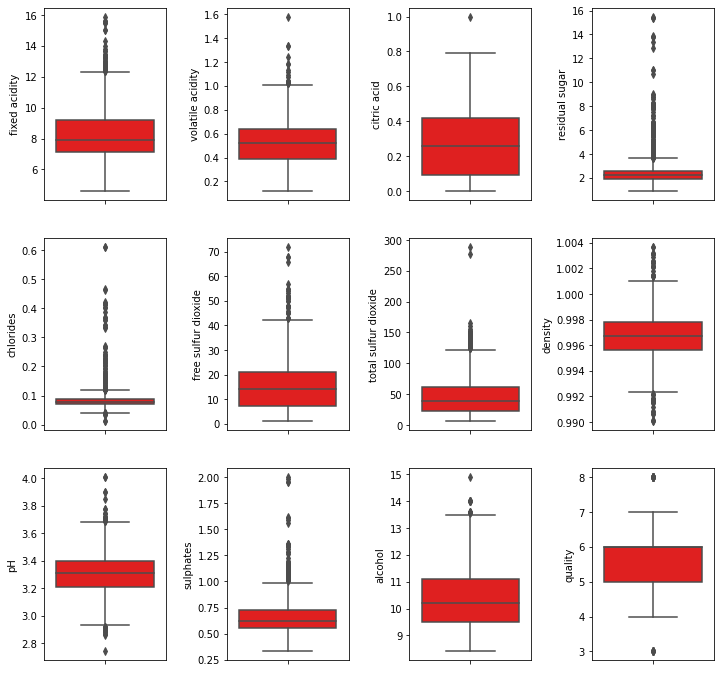

In [11]:
# create box plots
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(12,12))
index = 0
ax = ax.flatten()

for col in df.columns:
    sns.boxplot(y=col, data=df, ax=ax[index], color='r')
    plt.subplots_adjust(wspace = .5)
    index += 1

### Observations :
- From the histogram, we can see that feature density and pH are normally distributed
- Most of the remaining features are right-skewed.
- From boxplot its observed that outliers can be observed in almost all the features
- alcohol, citric acid, and volatile acidity has a very small no of outliers so safe to assume it won't affect the model

## 5. Bivariate  Exploaration

### Analysing the features with respect to quality

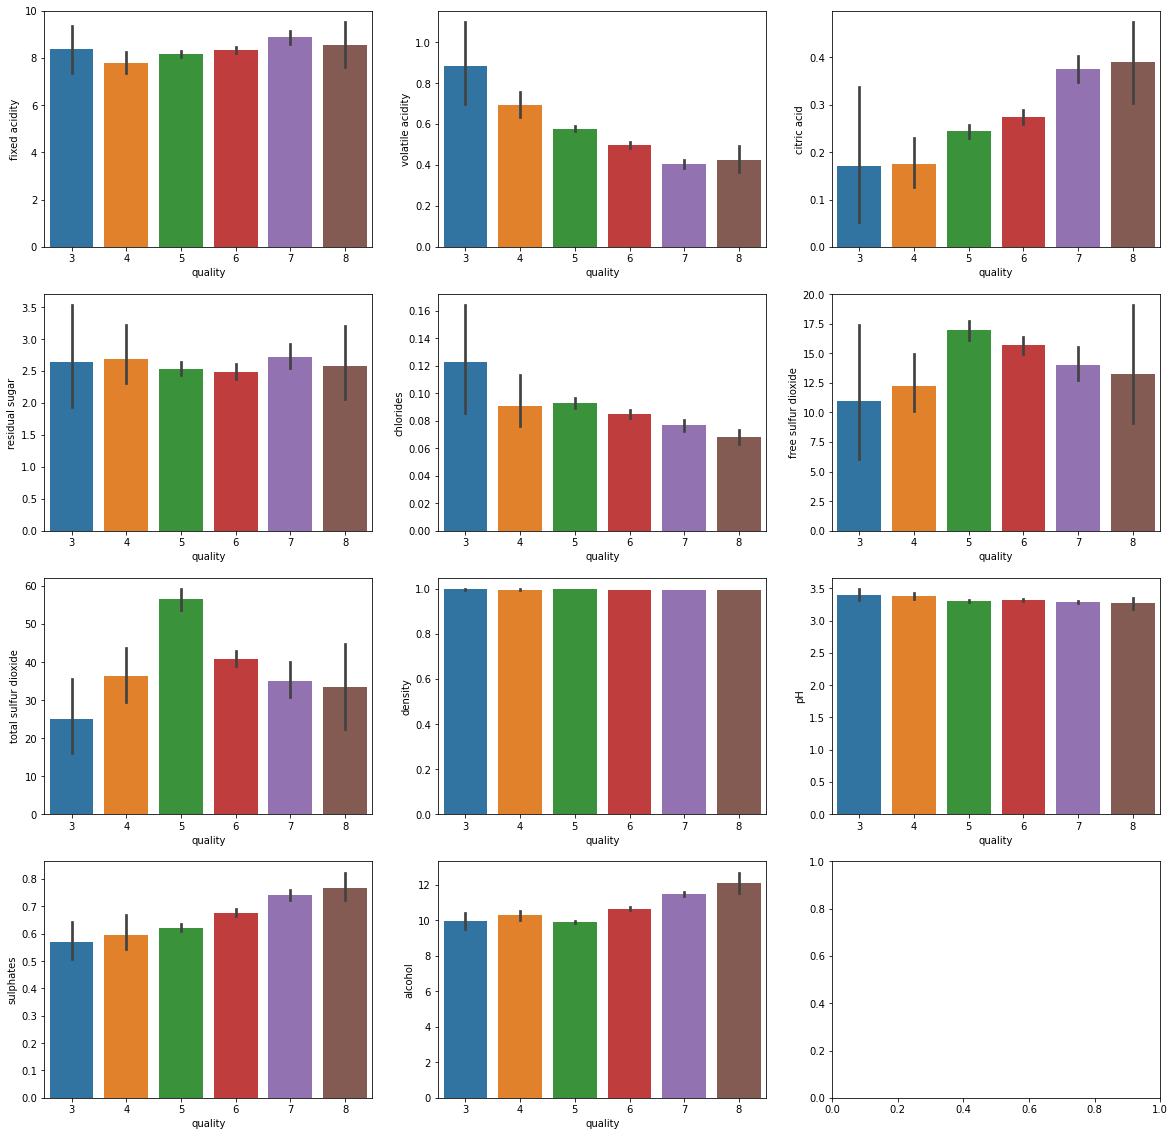

In [12]:
x = df.drop(columns="quality")
fig, axs = plt.subplots(4,3, figsize=(20,20))
fig.patch.set_facecolor('white')
attributes = x.columns
att = 0
for i in range(4):
    for j in range(3):
        try:
            sns.barplot(x="quality", y=attributes[att], data=df, estimator=np.mean, ax=axs[i][j])
        except: #to handle index value 11 
            print()
        att += 1

### Observations:
- volatile acidity and chlorides shows downward trend hence inversely proportional to quality. 
- Citric Acid, sulfate, and alcohol shows upward trend and are directly proportional to quality.
- Density, Residual sugar, and pH have no or little impact on quality
- free sulfur and total sulfur have similar kinds of impact

### Correlation coefficient

In [13]:
c = df.corr()
c

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

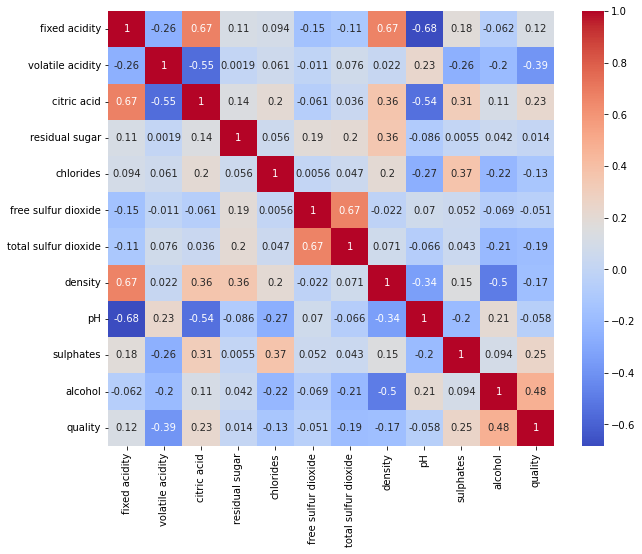

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(c, cmap = 'coolwarm', annot = True)

### Observations:
- There is no strong correlation between quality and the other features. Notables are alcohol, sulfate, citric acid, and volatile acidity.
- Quality has a moderate positive correlation with alcohol and a weak positive correlation with fixed acidity, sulfate, and citric acid
- Quality has a moderate negative correlation with volatile acidity
- Free sulfur dioxide and total sulfur dioxide appear to be multicollinear we can drop one of them

## 6. Conclusion of EDA

- The dataset provided appears to be pretty clean, with no missing values observed.
- All independent variables are numeric and the target value is classification based so we can apply logistic regression algorithms
- To have a good quality, wine must contain a good portion of citric acid, sulfate, and alcohol. Volatile acidity and chlorides amount must be kept low.
- Free sulfur dioxide and total sulfur dioxide have an almost similar impact on quality hence are multicollinear thus one of them can be dropped during training and testing.
- Density, Residual Sugar and pH have no direct impact on quality but have correlations with other features so should be kept in the data as of now.


## 7. Preprocessing Data

In [15]:
#first copy the original dataset to maintain backup

dfML = df.copy()
dfML.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Feature Encoding

Let's convert the target variable quality to the bivariate variable using feature encoding. This will help later to compare the confusion matrix for each applied model.

In [16]:
# encode quality into 2 classes, - ["Poor","Good"] 
# here bins are the range, 0-6 and 6-10
bins = [0, 6, 10]
labels = ["Poor","Good"]
dfML['quality'] = pd.cut(dfML['quality'], bins=bins, labels=labels)

In [17]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()
dfML['quality'] = label_quality.fit_transform(dfML['quality'])
dfML['quality'].value_counts()

1    1382
0     217
Name: quality, dtype: int64

### Train Test data splitting

- Here the dataset will first need to be separated into X = independent variables and y = target variable.
- Then dataset will be split into train and test datasets. We will use 80 - 20 split
- random_state = 42 is used for reproduction
- Fun Fact: Number 42 is used as an inside joke in the scientific and sci-fi community and it is derived from 'Hitchhiker’s Guide to the Galaxy. The number 42 also has a Wikipedia page for many pop culture references.


In [18]:
X = dfML.drop('quality', axis = 1)
y = dfML['quality']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Feature Scaling

Applying Standard scaling to get optimized result

In [20]:
sc = StandardScaler()

In [21]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## 8. Applying ML models

### Creating a function to do common tasks performed while applying the model so that we can reduce code repetition.

In [22]:
# First initialize the list variables to store different outputs
# We will use this later to compare all the different ML alorithms 
lst_model = []
lst_accuracy  = []
lst_accuracy_train = []
lst_accuracy_test = [] 
lst_cv_score = []
lst_TP = []
lst_TN = []
lst_FP = []
lst_FN = []

# fuction : accepts input model which is nothing but object instantiated of an algos
def applyMLmodel(model):
    # train the model
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test) * 100
    lst_accuracy.append(accuracy)
    print("Accuracy :", accuracy)
    
    # cross-validation , y_train.ravel() is similar to y_train.reshape(-1)
    cv = cross_val_score(estimator = model, X = X_train, y = y_train.ravel(), cv = 10)
    lst_cv_score.append(cv.mean())
    print("CV Score :", cv.mean())
    
    # predicting accuracy for training data set
    y_pred_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    lst_accuracy_train.append(accuracy_train)
    print("Accuracy(Training) :", accuracy_train)

    # predicting accuracy for test data set
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    lst_accuracy_test.append(accuracy_test)
    print("Accuracy(Test) :", accuracy_test)

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    print("Confusion Matrix :")
    print(cm)

    # storing TN,TP,FN and FP as a part of list
    lst_TN.append(cm[0,0])
    lst_FP.append(cm[0,1])
    lst_FN.append(cm[1,0])
    lst_TP.append(cm[1,1])

### LogisticRegression 

In [23]:
model = LogisticRegression()
applyMLmodel(model) 
lst_model.append("LogisticRegression")

Accuracy : 87.5
CV Score : 0.885857529527559
Accuracy(Training) : 0.8858483189992181
Accuracy(Test) : 0.875
Confusion Matrix :
[[ 12  35]
 [  5 268]]


### DecisionTreeClassifier

In [24]:
model = DecisionTreeClassifier()
applyMLmodel(model)
lst_model.append("DecisionTreeClassifier")

Accuracy : 84.375
CV Score : 0.8694697342519685
Accuracy(Training) : 1.0
Accuracy(Test) : 0.84375
Confusion Matrix :
[[ 22  25]
 [ 25 248]]


### RandomForestClassifier

In [25]:
model = RandomForestClassifier()
applyMLmodel(model)
lst_model.append("RandomForestClassifier")

Accuracy : 88.75
CV Score : 0.9101070374015748
Accuracy(Training) : 1.0
Accuracy(Test) : 0.8875
Confusion Matrix :
[[ 20  27]
 [  9 264]]


### KNearest

In [26]:
model =KNeighborsClassifier()  
applyMLmodel(model)
lst_model.append("KNeighborsClassifier")

Accuracy : 87.5
CV Score : 0.8725701279527559
Accuracy(Training) : 0.9124315871774824
Accuracy(Test) : 0.875
Confusion Matrix :
[[ 19  28]
 [ 12 261]]


### GaussianNB - Naive Bayes

In [27]:
model = GaussianNB()
applyMLmodel(model)
lst_model.append("GaussianNB")

Accuracy : 85.3125
CV Score : 0.8373462106299213
Accuracy(Training) : 0.8389366692728695
Accuracy(Test) : 0.853125
Confusion Matrix :
[[ 35  12]
 [ 35 238]]


## 9. Comparing the results of ML algorithms

We will first convert all the list of outputs into dataframe which will be easy to compare and visuallize

In [28]:
predictiondf = pd.DataFrame({'Model': np.array(lst_model),
                             'Accuracy': np.array(lst_accuracy),
                             'Accuracy(Training)' : np.array(lst_accuracy_train),
                             'Accuracy(Test)' : np.array(lst_accuracy_test),
                             'CV Score' : np.array(lst_cv_score),
                             'True Positive' : np.array(lst_TP),
                             'True Negative' : np.array(lst_TN),
                             'False Positive' : np.array(lst_FP),
                             'False Negative' : np.array(lst_FN)
                            })
predictiondf

,Model,Accuracy,Accuracy(Training),Accuracy(Test),CV Score,True Positive,True Negative,False Positive,False Negative
0,LogisticRegression,87.5000,0.885848,0.875000,0.885858,268,12,35,5
1,DecisionTreeClassifier,84.3750,1.000000,0.843750,0.869470,248,22,25,25
2,RandomForestClassifier,88.7500,1.000000,0.887500,0.910107,264,20,27,9
3,KNeighborsClassifier,87.5000,0.912432,0.875000,0.872570,261,19,28,12
4,GaussianNB,85.3125,0.838937,0.853125,0.837346,238,35,12,35


### Comparing the outputs using visalization

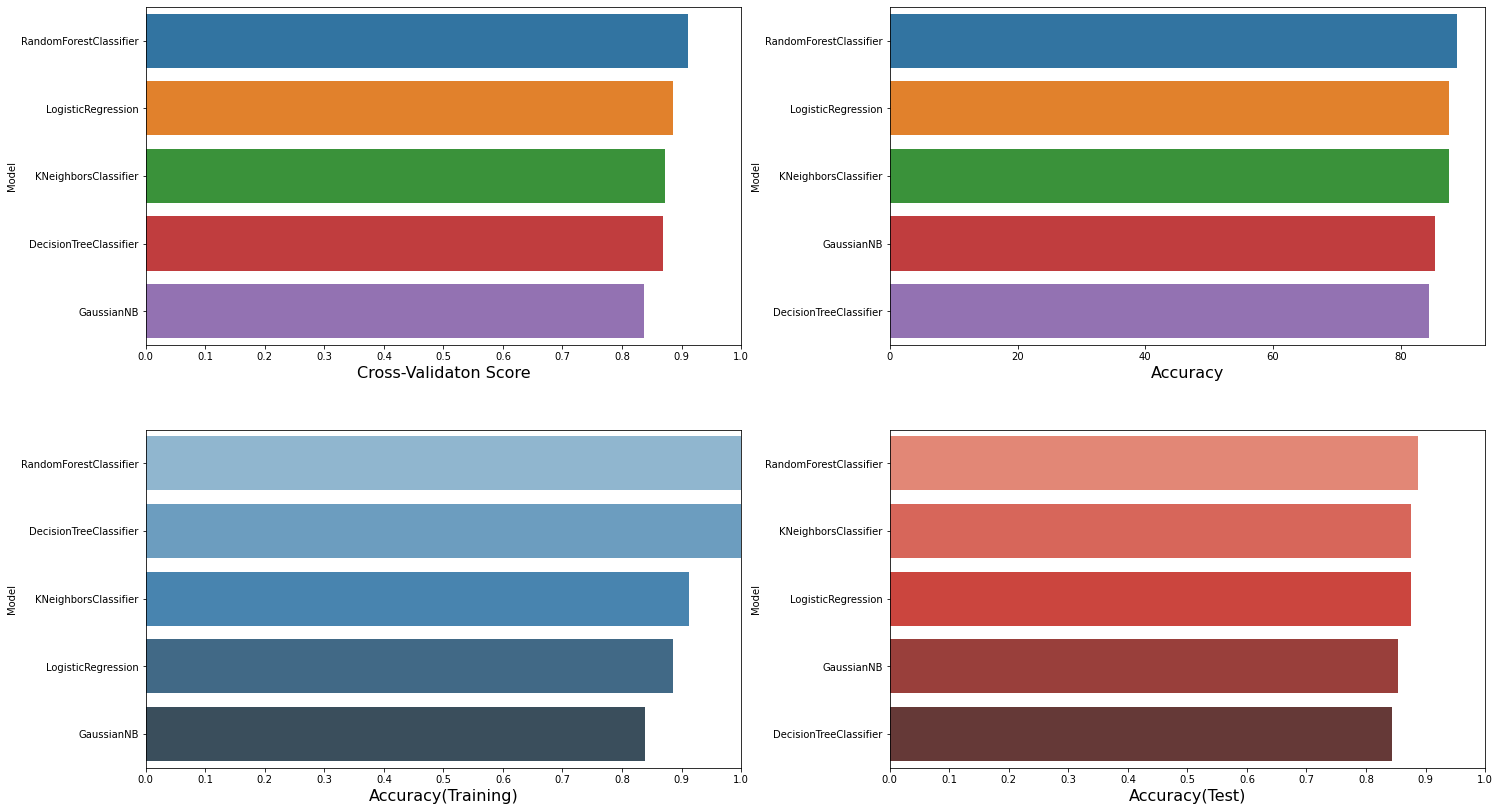

In [29]:
fig, ax = plt.subplots(2,2, figsize=(24,14))
plt.subplots_adjust(wspace = .25, hspace = .25)
#comparing CV score
predictiondf.sort_values(by=['CV Score'], ascending=False, inplace=True)

sns.barplot(x='CV Score', y='Model', data = predictiondf, ax = ax[0][0])
ax[0][0].set_xlabel('Cross-Validaton Score', size=16)
ax[0][0].set_ylabel('Model')
ax[0][0].set_xlim(0,1.0)
ax[0][0].set_xticks(np.arange(0, 1.1, 0.1))

#comparing accuracy
predictiondf.sort_values(by=['Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Accuracy', y='Model', data = predictiondf, ax = ax[0][1])
ax[0][1].set_xlabel('Accuracy', size=16)
ax[0][1].set_ylabel('Model')

#comparing accuracy(training)
predictiondf.sort_values(by=['Accuracy(Training)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(Training)', y='Model', data = predictiondf, palette='Blues_d', ax = ax[1][0])
ax[1][0].set_xlabel('Accuracy(Training)', size=16)
ax[1][0].set_ylabel('Model')
ax[1][0].set_xlim(0,1.0)
ax[1][0].set_xticks(np.arange(0, 1.1, 0.1))

#comparing accuracy(testing)
predictiondf.sort_values(by=['Accuracy(Test)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(Test)', y='Model', data = predictiondf, palette='Reds_d', ax = ax[1][1])
ax[1][1].set_xlabel('Accuracy(Test)', size=16)
ax[1][1].set_ylabel('Model')
ax[1][1].set_xlim(0,1.0)
ax[1][1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

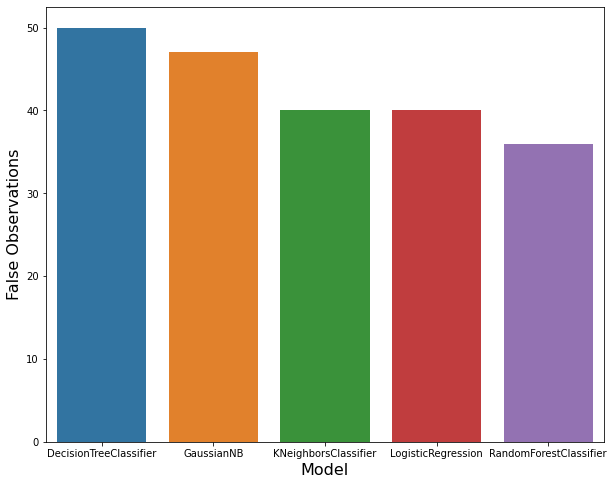

In [30]:
# Comparing how many false prediction made by each model
predictiondf.sort_values(by=(['Accuracy(Test)']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,8))
sns.barplot(x = predictiondf['Model'], y=predictiondf['False Positive'] + predictiondf['False Negative'], ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('False Observations', size=16)

plt.show()

### Observation :
- The random Forest algorithm gives the highest CV score and highest accuracy
- K-Neighbor performs consistently across the accuracy but has scored a little low on CV score than other algos.
- GaussianNB model is poor performing on every aspect when compared to other algos.
- The Decision Tree predicts a higher percentage of false predictions, and logistic regression has the least number of false predictions.
- All of the model has accuracy in the range of 84-88, so pretty accurate.
